In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from math import ceil

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import rcParams

from evaluate import evaluate
from generate_data import generate_data
from model import get_predictions

In [3]:
plt.style.use('dark_background')
rcParams['figure.figsize'] = 16, 6

In [4]:
data = generate_data()
data

,y
ds,
2010-01-01,0.360458
2010-01-02,1.126528
2010-01-03,1.709483
2010-01-04,2.328263
2010-01-05,2.905436
...,...
2013-10-27,2.013790
2013-10-28,2.780354
2013-10-29,3.831688


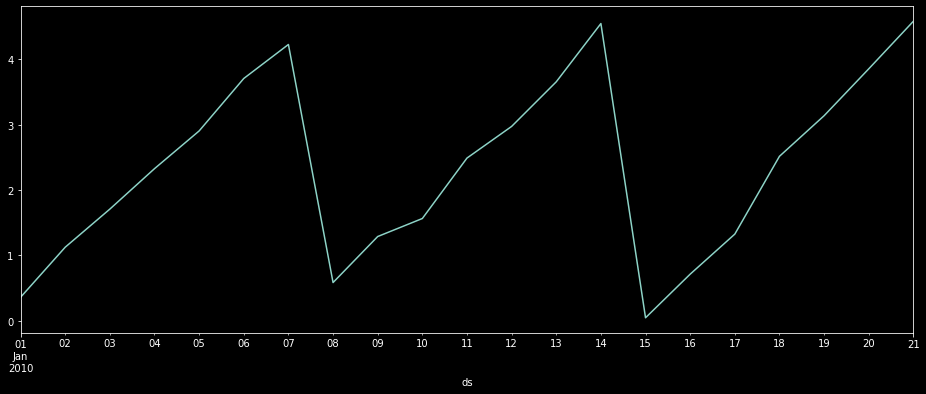

In [5]:
data.y.head(21).plot();

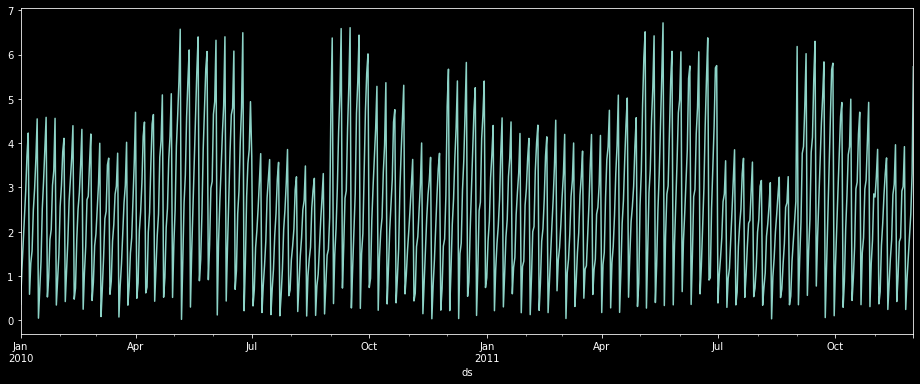

In [6]:
data.y.head(700).plot();

MSE: 0.68


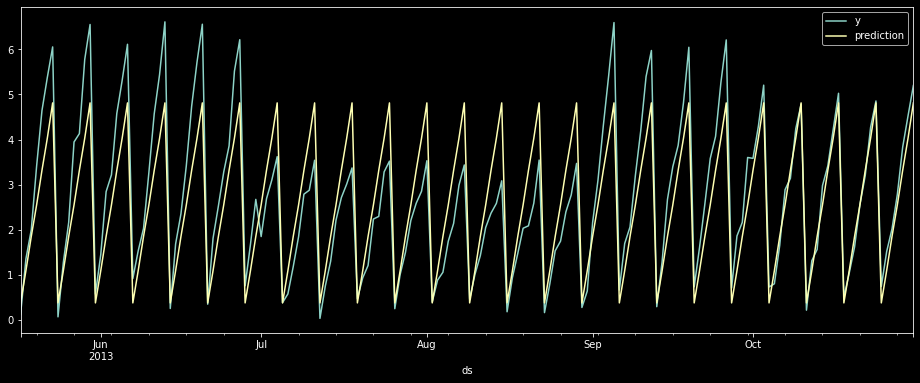

In [7]:
test_horizon = 28*6
evaluate(test_horizon)
preds = get_predictions(data.head(-test_horizon), test_horizon)
y_true = data.tail(test_horizon).copy()
y_true['prediction'] = preds
y_true[['y', 'prediction']].plot();